## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Importing Data & Preprocessing

In [3]:
dataset = pd.read_csv('Parkinson_Dataset_2.csv')
# dataset.shape
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9 ,test_size=0.1, random_state=0)

In [5]:
# plt.figure(figsize=(12,10))
# cor = dataset.corr()
# sns.heatmap(cor)
# plt.show()

# Training and Making Predictions

## Prediction using Random Forrest

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
# accuracy = classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)
# print(accuracy)

In [7]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy Using Random Forrest Classifier is ' + str(accuracy_score(y_test, y_pred)))

[[21  7]
 [ 2 21]]
Accuracy Using Random Forrest Classifier is 0.8235294117647058


## Prediction using Decision Tree

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)
accuracy = tree.score(X_test,y_test)
print("Accuracy predicted using Decision Tree ",accuracy)

Accuracy predicted using Decision Tree  1.0


## Visualising 1-D LDA

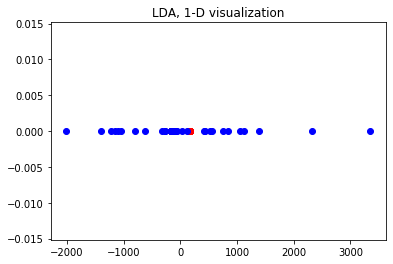

In [10]:
LDA = LinearDiscriminantAnalysis(n_components=1) # model for reduction in 1D


# Fit the method's model
LDA.fit(X_train, y_train)

# Fit the classifier on the embedded training set
tree.fit(LDA.transform(X_train), y_train)

# Compute the  accuracy on the embedded test set
X_p_transformed = LDA.transform(X_train)
X_n_transformed = LDA.transform(X_test)
plt.figure()
plt.scatter(X_p_transformed,np.zeros(len(X_train)),c='r')
plt.scatter(X_n_transformed,np.zeros(len(X_test)),c='b')
plt.title("LDA, 1-D visualization")
plt.show()